In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

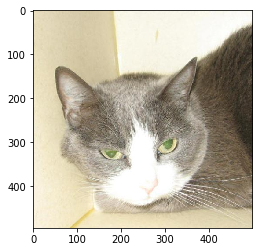

In [4]:
# Show a random images from CAT category 

rand = np.random.randint(0,9373)


cat_rand=cv2.imread("CATS_DOGS/train/CAT/{}.jpg".format(str(rand)))
cat_rand=cv2.cvtColor(cat_rand,cv2.COLOR_BGR2RGB)
plt.imshow(cat_rand)

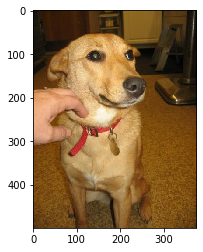

In [5]:
# Show a random images from CAT category 

dog_rand=cv2.imread("CATS_DOGS/train/DOG/{}.jpg".format(str(rand)))
dog_rand=cv2.cvtColor(dog_rand,cv2.COLOR_BGR2RGB)
plt.imshow(dog_rand)

In [6]:
# It should be noticed that our images have different size

print ("Cat: ",cat_rand.shape)
print("Dog: ", dog_rand.shape)

Cat:  (496, 500, 3)
Dog:  (500, 375, 3)


In [75]:
from keras.preprocessing.image import ImageDataGenerator, load_img
"""
rotation_range=30: randomly rotate image angle from 0 to 30 degree
width_shift_range=0.1: randomly stretch the image along x_axis from 0 to 10%
height_shift_range=0.1: randomly stretch the image along y_axis from 0 to 10%
rescale=1/255: rescale image to the range from 0 to 1
shear_range=0.2: randomly crop the image from 0 to 20%
zoom_range=0.2: randomly zoom the image from 0 to 20%
horizontal_flip=True: randomly flip the image in horizontal direction
fill_mode="nearest": During the random image processing, we will fill in the mixing pixels with the nearset ones if they are missing 
"""
image_gen = ImageDataGenerator(rotation_range=45,
                              width_shift_range=0.1,
                              height_shift_range=0.2,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

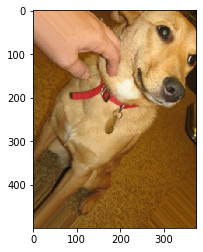

In [11]:
plt.imshow(image_gen.random_transform(dog_rand))

In [12]:
image_gen.flow_from_directory("CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [13]:
input_shape = (150,150,3)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [48]:
# Create my own Convolutional Neural Network

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

# Randomly turon 50% of the neurons during training to avoid overfitting
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [49]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 128)      

In [50]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical")

Found 18743 images belonging to 2 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical")

Found 6251 images belonging to 2 classes.


In [52]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [53]:
results=model.fit_generator(train_image_gen,epochs=100,steps_per_epoch=len(train_image_gen),
                           validation_data=test_image_gen,validation_steps=len(test_image_gen))

Epoch 1/100
 963/1172 [=======================>......] - ETA: 1:23 - loss: 0.6914 - accuracy: 0.5476

/home/comp1/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/comp1/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/comp1/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/comp1/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/comp1/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly

1172/1172 [==============================] - 563s 481ms/step - loss: 0.6894 - accuracy: 0.5501 - val_loss: 0.6666 - val_accuracy: 0.5660
Epoch 2/100
1172/1172 [==============================] - 503s 429ms/step - loss: 0.6811 - accuracy: 0.5657 - val_loss: 0.6577 - val_accuracy: 0.5649
Epoch 3/100
1172/1172 [==============================] - 508s 434ms/step - loss: 0.6746 - accuracy: 0.5824 - val_loss: 0.6526 - val_accuracy: 0.6113
Epoch 4/100
1172/1172 [==============================] - 505s 431ms/step - loss: 0.6643 - accuracy: 0.6045 - val_loss: 0.6033 - val_accuracy: 0.6431
Epoch 5/100
1172/1172 [==============================] - 503s 429ms/step - loss: 0.6303 - accuracy: 0.6454 - val_loss: 0.6312 - val_accuracy: 0.6604
Epoch 6/100
1172/1172 [==============================] - 503s 429ms/step - loss: 0.5971 - accuracy: 0.6839 - val_loss: 0.6507 - val_accuracy: 0.6925
Epoch 7/100
1172/1172 [==============================] - 497s 424ms/step - loss: 0.5718 - accuracy: 0.7079 - val_loss:

Epoch 56/100
1172/1172 [==============================] - 493s 421ms/step - loss: 0.3619 - accuracy: 0.8397 - val_loss: 0.4954 - val_accuracy: 0.7749
Epoch 57/100
1172/1172 [==============================] - 493s 420ms/step - loss: 0.3565 - accuracy: 0.8442 - val_loss: 0.3601 - val_accuracy: 0.8271
Epoch 58/100
1172/1172 [==============================] - 493s 421ms/step - loss: 0.3523 - accuracy: 0.8468 - val_loss: 0.1497 - val_accuracy: 0.8352
Epoch 59/100
1172/1172 [==============================] - 493s 421ms/step - loss: 0.3557 - accuracy: 0.8429 - val_loss: 0.4408 - val_accuracy: 0.8056
Epoch 60/100
1172/1172 [==============================] - 494s 422ms/step - loss: 0.3557 - accuracy: 0.8451 - val_loss: 0.1759 - val_accuracy: 0.8410
Epoch 61/100
1172/1172 [==============================] - 493s 421ms/step - loss: 0.3491 - accuracy: 0.8483 - val_loss: 0.2313 - val_accuracy: 0.8111
Epoch 62/100
1172/1172 [==============================] - 493s 421ms/step - loss: 0.3485 - accuracy:

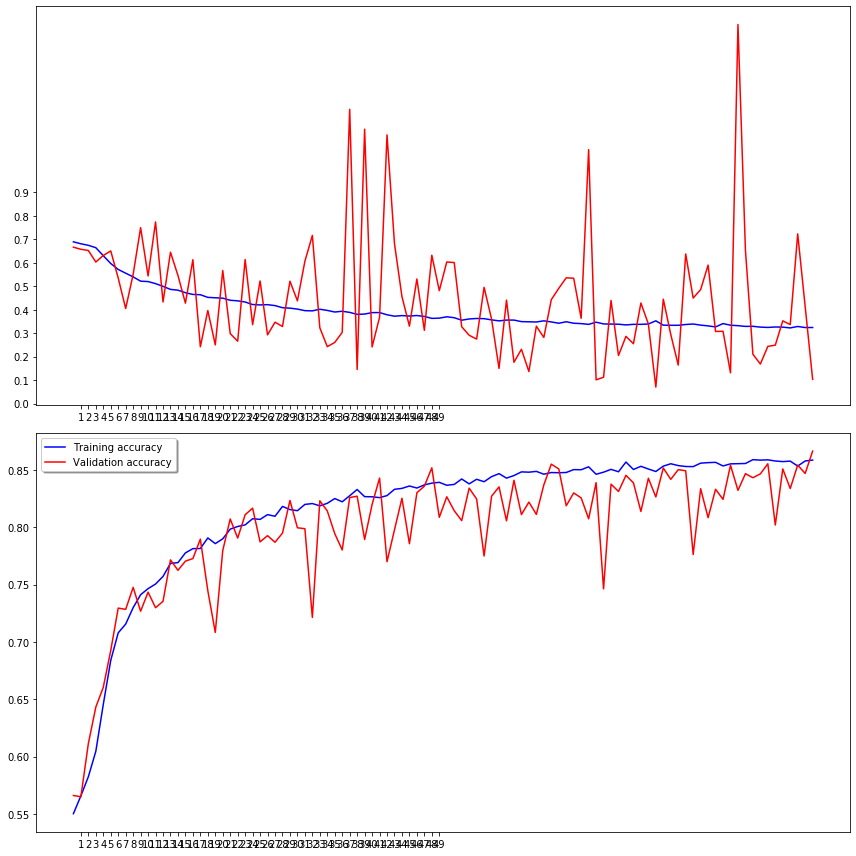

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(results.history['loss'], color='b', label="Training loss")
ax1.plot(results.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(results.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(results.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [67]:
model.save("Dog_cat_MTC.h5")

In [68]:
from keras.models import load_model
model = load_model("Dog_cat_MTC.h5")

In [69]:
def show_result(test_image):
    test_image = cv2.imread("CATS_DOGS/test1/{}".format(test_image))
    test_image = cv2.resize(test_image,(150,150))
    test_image = test_image/255
    test_image = test_image.reshape(1,150,150,3)
    
    prediction = model.predict_classes(test_image)
    prediction_prob = model.predict(test_image)
    
    if prediction.max()==1:
        return "DOG"
    else:
        return "CAT"

In [70]:
import os
test_random = os.listdir("CATS_DOGS/test1/")

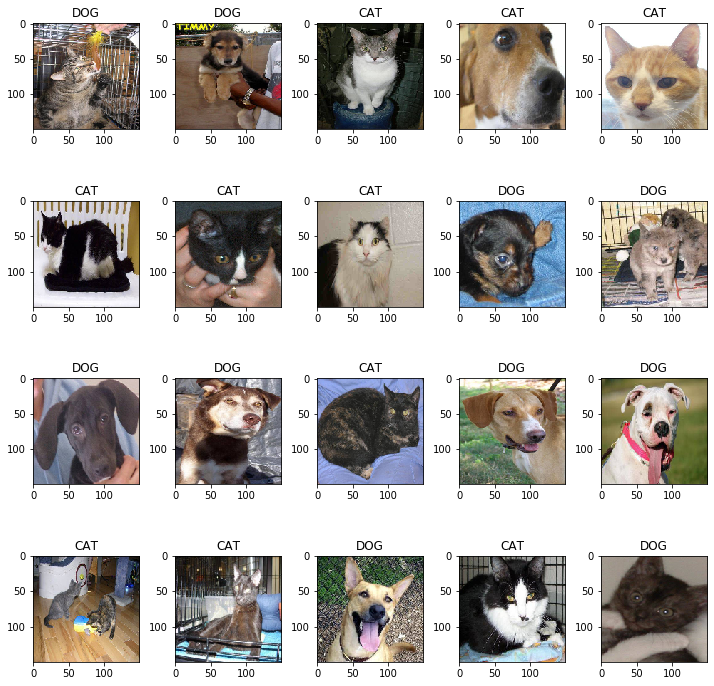

In [82]:
w=10
h=10
fig=plt.figure(figsize=(w, h))
columns = 5
rows = 4
fig_list= []

for i in range(1, columns*rows +1):
    rand = np.random.randint(6251)
    fig_list.append(fig.add_subplot(rows, columns, i))
    fig_list[-1].set_title(show_result(test_random[rand]))
    img = load_img("CATS_DOGS/test1/{}".format(test_random[rand]),target_size=(150,150))
    plt.imshow(img)
    
plt.tight_layout(True)   
plt.show()